In [39]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 13 _ Customer Segmentation ( Customer Segmentation Data csv)
### YT - Siddhardhan

##### Car Data ---> Data Pre-Processing ---> Data Analysis ---> Optimum No. of Clusters ---> Train Test Split ---> K-Means Model

In [4]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
# Data Collection
Customer_data = pd.read_csv(r'C:\Users\Home\Desktop\ML Projects\YT - Siddhardhan\Mall_Customers.csv')
Customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# Checking for missing values
Customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# choosing Annual Income Column and Spending Score Column
X = Customer_data.iloc[:,[3,4]].values

In [17]:
# Choosing the Number of Clusters Required
# WCSS ----> Within Clusters Sum of Square
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Optiumum Number of Clusters = 5


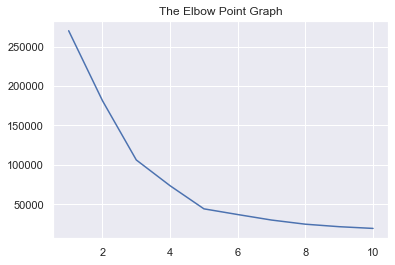

In [20]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')

print("Optiumum Number of Clusters = 5")

In [22]:
# Training the K-Means Clustering Model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
# Returns a label for each data point based on thier cluster

                                            y = kmeans.fit_predict(X)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0, 0.5, 'Spending Score')

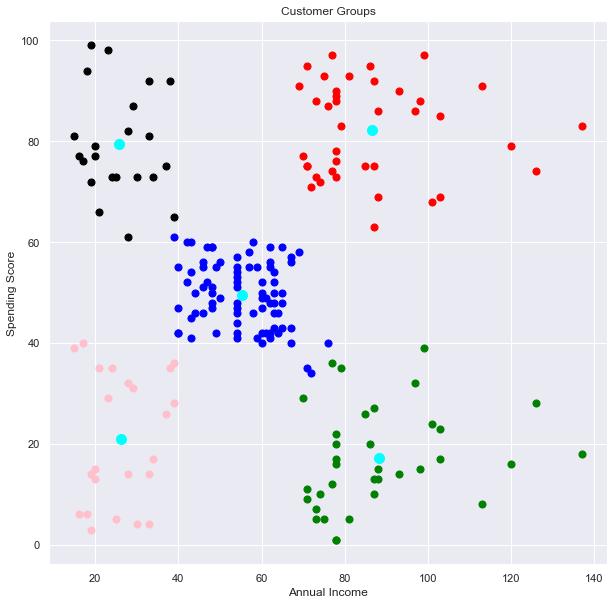

In [38]:
# Visualizing the Clusters and their Clusters
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0], X[y==0,1],s=50,c='green',label='Cluster 1 ')
plt.scatter(X[y==1,0], X[y==1,1],s=50,c='blue',label='Cluster 2 ')
plt.scatter(X[y==2,0], X[y==2,1],s=50,c='red',label='Cluster 3 ')
plt.scatter(X[y==3,0], X[y==3,1],s=50,c='black',label='Cluster 4 ')
plt.scatter(X[y==4,0], X[y==4,1],s=50,c='pink',label='Cluster 5 ')

# Plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=100,c='cyan',label='Centriods')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')